In [ ]:
!pip install summarytools

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
import pandas as pd
from summarytools import dfSummary

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DEBI/Data science /1- What is Data Science -1week &1 day/session 19/Train.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
dfSummary(df)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 463479.2 (2595.4)min < med < max:458982.0 < 463472.5 < 467974.0IQR (CV) : 4503.5 (178.6),"8,068 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACr0lEQVR4nO3YvW/aQBjH8ecgCRegtngp2Vg6RuqAlIWlW8b+sV27BYlInTN06ZQlioSIEW4QjqFD0qkqcDYp+anfz5wnPt99MS9uvV4b8NZVDr0AYBdHh17AJs65UzM7KTi+XK/Xj/tcz65U1/2WbQ31UJvunDvtdDqfoyhqFZl/eHiYO+e+mtmiyLw9v9usCsz5drt9Gcdxo8hFZ7PZ1Dn3pcy+WfHzKnrP+5jf2MrGUMvGUnLTT6Ioag2Hw8c4joNiu7u7e3d9ff2p3+93q9VqcKh5nh+nafqh2Wz+qFQqWchslmXezM4vLi6+dbvdWchskiR+PB63JpPJiZkF71mZ8ypzz/uY39bKtidq4ViSJPGj0ag3mUy6zrmgA3sRrVar4ziOp71e72fI4HQ6PfXe1weDweLs7GwaeuHb29vWzc3N+8Fg8D10/mW27r3PQtdtZpbneWRmkXMudNTMLGo2m73hcDgLPa8y91x2fpcX6E6fUeM4XoRuepqmx1mWfez3+9UiT7Usy3ye5+eLxeLKzIIP3Mys0WgEr9vsOfSi879ni9jXntVqtaui6z7Enr3YuG+v9mVquVwe7eGpVn96eqq+xvreIvbs7179W3/ZV+j/iD37E7+jQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQsLRLn+UJIkP/cfz+dybmaVp6u/v7+v/cl712qrrLju/S1+/AN8TZLtKM6GDAAAAAElFTkSuQmCC"">",0(0.0%)
2,Gender[object],1. Male2. Female,"4,417 (54.7%)3,651 (45.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa9CETNRBJy1YM/nJuPes4GMuhgQ/V0oxQMGZ2d3Mbr0PuZhXKeXR+4iz8eM4foQQht6HXEnOeXXOfRLcXz6EMMzz/IgxPnsfcwXbtr2nlIZlWW5mRmy/eDOzGONzmqav3sdcyL33AWf01vsA/B/EBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIeLOfD/56H3IVPMs6n3NeU0qD8cFfMznn1cxeve84GwYvx2DwssMx5YMKb7Y63k6NMeWrYI7XHlO+HczxjsGUr45f543xpy5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskGHKt4PncQymfBXM8dpj8FLH4KWxbwpbat/D6U2YAAAAAElFTkSuQmCC"">",0(0.0%)
3,Ever_Married[object],1. Yes2. No3. nan,"4,643 (57.5%)3,285 (40.7%)140 (1.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABm0lEQVR4nO3bQWrCUBRG4RsJUicJQXAxWUQX20VkN0F8gypO0kFtazvPeSX3fDNnTzkoT/I3y7KERNjVPoDyaCLiEBH72gfZuPuyLNfah6itPR6Pr13XDbUPsmWllHPTNG/Zg2u7rhvGcbz2fX+rfZgtulwuL9M0DfM87yMid2wREX3f306n03vtw2zYofYB/gMvCMIYmzDGJoyxCWNswhibMMYmjLEJY2zCGJswxiaMsQljbMIYmzBtxOczV7UPslV+tj/aUsp5mqYhfOZqNaWUc0Tca5+jNjcIDDcIEdE45RMl+zeb3zig1OsqV0+stOsqV0+87Osqb+Ag/9QVxtiEMTZhjE0YYxPG2IQxNmGMTRhjE8bYhDE2YYxNGGMTxtiESbuuyviea0u9rnL1xHKD4CPhGNdVwnhBEObvz6g/K1rNrymf0zatafc15RvH8fqILutlQSv7nvI9Xqf7+0McLwjCGJswxiaMsQljbMIYmzDGJoyxCWNswhibMMYmjLEJY2zCGJswaad84j1P+Zy2aVVuEIRxyifMB+Neluse89fbAAAAAElFTkSuQmCC"">",140(1.7%)
4,Age[int64],Mean (sd) : 43.5 (16.7)min < med < max:18.0 < 40.0 < 89.0IQR (CV) : 23.0 (2.6),67 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACr0lEQVR4nO3dT27aQBSA8TclgPkjI0QFOy5QqQuWPkQP2yMEiRPkBuyQLGSEGwtj3BWVqqYBZux03vT77U29+OR43shTU9e1AL779K9vALjHU5s/bowZiEjP4SdOdV2/NnU/0Ku1UI0xg9ls9i2O46ntbxwOh70x5juxos0nai+O42mSJK+TyaR49OIsy6LNZjNN07QnIoT6n2v1T7+IyGQyKebz+Q/LyweN3gzUYjEFFVp/orqoqqorIrExxuZyFmIB8TbUPM+7ZVl+XS6XnU6n8/A7LguxsHgb6ul0eoqiaLharYrFYrF/5FoWYuHxNtSr0WhkuxhjIRYQFlNQgVChAqFCBe/fUW05jrZEGG95JchQXUdbIoy3fBNkqC6jLRHGWz4KMtQrh9GWVFUVC7ti3gg6VFvsivmHUN/Arph/CPUd7Ir5gzkqVCBUqECoUOHmO6rDl6Tx5XLpWlwH/OHdUF2+JC3LMqqq6ktRFM8iYvvNFCAit5+o1l+Sbrfb6cvLy/B8Pncc7g8QkTvHUzZfku73e0Y0aAyLKahAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKvC5dAv4vweaR6gN45SVdhBqwzhlpR2E2hJOWWkWiymowBPVM5yU/TZC9QgnZf8doXqkiZOy1+v1PE3Tz8aYg80t+Bo4oXrIdiEW8miMUAMS8m

# Clean
drop ID,Segmentation

In [ ]:
df = df.drop(['Segmentation', 'ID'], axis=1)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


In [ ]:
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6665 non-null   object 
 1   Ever_Married     6665 non-null   object 
 2   Age              6665 non-null   int64  
 3   Graduated        6665 non-null   object 
 4   Profession       6665 non-null   object 
 5   Work_Experience  6665 non-null   float64
 6   Spending_Score   6665 non-null   object 
 7   Family_Size      6665 non-null   float64
 8   Var_1            6665 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 520.7+ KB


In [ ]:
df = df.reset_index()
df.head()

,index,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
2,3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
3,5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6
4,6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6


In [ ]:
df = df.drop("index", axis=1)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
2,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
3,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6
4,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6


# Formatting the data for the K-means clustering model

In [ ]:
df_new = pd.get_dummies(df)
df_new.head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,False,True,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
1,67,1.0,1.0,True,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
2,67,0.0,2.0,False,True,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
3,56,0.0,2.0,False,True,False,True,True,False,True,...,True,False,False,False,False,False,False,False,True,False
4,32,1.0,3.0,False,True,True,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
df_kmeans = pd.get_dummies(df, drop_first=True)
df_kmeans.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,67,1.0,1.0,False,True,True,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,67,0.0,2.0,True,True,True,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
3,56,0.0,2.0,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,32,1.0,3.0,True,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


# Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_kmeans = scaler.fit_transform(df_kmeans)

# Creating the K-means clustering model!

In [ ]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(scaled_df_kmeans)
df_kmeans.insert(df_kmeans.columns.get_loc("Age"), "Cluster", clusters)
df_kmeans.head(3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Cluster,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,2,22,1.0,4.0,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,1,67,1.0,1.0,False,True,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,0,67,0.0,2.0,True,True,True,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [ ]:
df_kmeans.head(10)

,Cluster,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,2,22,1.0,4.0,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,1,67,1.0,1.0,False,True,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,0,67,0.0,2.0,True,True,True,False,False,False,...,True,False,True,False,False,False,False,False,True,False
3,1,56,0.0,2.0,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2,32,1.0,3.0,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
5,2,33,1.0,3.0,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
6,1,61,0.0,3.0,False,True,True,False,True,False,...,False,False,False,True,False,False,False,False,False,True
7,1,55,1.0,4.0,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8,2,26,1.0,3.0,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False
9,2,19,4.0,4.0,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False


In [ ]:
df_kmeans["Cluster"].value_counts()

,count
Cluster,
1,3320
2,2848
0,497


# Finding the ideal number of clusters with the elbow method

In [ ]:
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df_kmeans)
    ssd.append(kmeans_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [ ]:
ssd

[686113.1429740032,
 373809.09789496806,
 254030.43751718244,
 201099.7144579759,
 169958.57420814835,
 148877.2371382989,
 124673.27789142345]

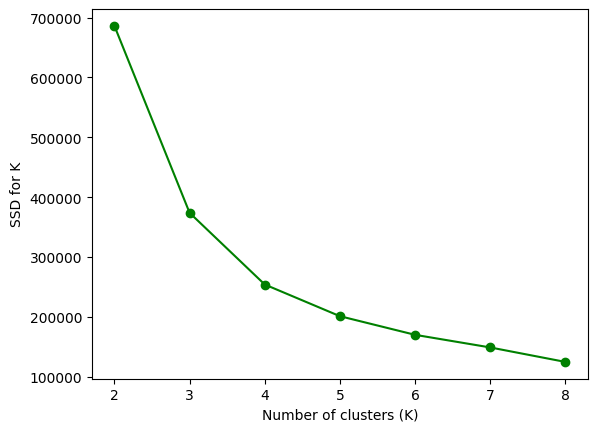

In [ ]:
import matplotlib.pyplot as plt
plt.plot([range(2, 9)], ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()